# Machine Learning for Classification
---
```bash
Author: Witchakorn Wanasanwongkot
```

## Telco Customer Churn
*URL = "https://www.kaggle.com/blastchar/telco-customer-churn"*

### Introduction
**Context:**
- Predict behavior to retain customers. The dataset was obtained from Kaggle.

**Content:**
- Each row represents a customer, each column contains customer’s attributes.

    *The data set includes information about:*
    - Customers who left within the last month – the column is called Churn
    - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    - Demographic info about customers – gender, age range, and if they have partners and dependents

**Machine Learning Algorithm:**
- Logistic Regression


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from pprint import pprint

## Data Preparation

In [3]:
# Load data into DataFrame.
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(len(df))
df.head()

7043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Preview the column name and check for consistency. 
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# Normorlize column name to lower case.
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
# Notice that the column `totalcharges` does not a numerical values.  
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
# There are something not numerical values include in the column!
# So, the parameter `coerce` is needed to help invalid parsing will be set as NaN.
pd.to_numeric(df['totalcharges'])

ValueError: Unable to parse string "_" at position 488

In [6]:
# Convert the `totalcharges` column to a numeric data type, ignoring any parse errors.
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(0)

In [68]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [7]:
# Convert the target variable to a categorical data type.
df.churn = (df.churn == 'yes').astype(int)

In [70]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

## Validation Framework
The train-validation-test split is a common technique used in machine learning to evaluate the performance of a model. The data is split into three separate subsets.

<p align="center">
    <img src="https://b1739487.smushcdn.com/1739487/wp-content/uploads/2021/04/train-and-test-1-min-1.png?lossy=0&strip=1&webp=1">
</p>

- **Training Set**: This is the largest subset of the data and is used to train the model. The model is `fit to the training set by adjusting the model parameters` to minimize the error between the predicted output and the actual output.
- **Validation Set**: This subset of the data is used to `evaluate the performance of the model during training`. The model is not trained on this data, but rather it is used to `tune the model hyperparameters`, such as learning rate, number of hidden layers, regularization strength, and so on. The validation set can also be used to `identify and diagnose` issues with the model such as `overfitting`, where the model performs well on the training set but poorly on new data.
- **Test Set**: This is the final subset of the data and is used to `evaluate the performance of the model after it has been trained and tuned on the training and validation sets`. The model is not allowed to see the test set during training, so it serves as an unbiased `estimate of the model's true performance on new data`.

In [8]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
print("df_train: {:>5}, df_val: {:>5}, df_test: {:>5}".format(len(df_train), len(df_val), len(df_test)))

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values
print("y_train:  {:>5}, y_val:  {:>5}, y_test:  {:>5}".format(len(y_train), len(y_val), len(y_test)))

df_train:  4225, df_val:  1409, df_test:  1409
y_train:   4225, y_val:   1409, y_test:   1409


In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

del df_train['churn']
del df_val['churn']
del df_test['churn']

## Exploratory Data Analysis

In [47]:
# Looking for null values
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [49]:
# Determine the churn target distribution.
df_train_full.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [11]:
# The churn rate formula can be calculated as the number of churned divided by the total number of customers.
global_mean = df_train_full.churn.mean()
print("GLobal Churn Rate: {}".format(round(global_mean, 2)))

GLobal Churn Rate: 0.27


In [54]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [10]:
# Distinguish categorical variables from numerical variables.
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance
Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

### Churn Rate
Difference between mean of categories for a feature and mean of the target variable. The larger differences are indicators that a variable is more important than others.

$$Churn \ Rate = GROUP \_ MEAN - GLOBAL \_ MEAN$$
- *If the difference is lower than 0, the group is less likely to churn.*
- *If the difference is greater than 0, it means that the category is more likely to churn.*

### Risk ratio
Ratio between mean of categories for a feature and mean of the target variable. It expresses the feature importance in relative terms.

$$Risk \ Ratio = \frac{GROUP \_ MEAN}{GLOBAL \_ MEAN}$$
- *If the ratio is lower than 1, the category is less likely to churn.*
- *If the ratio is greater than 1, the category is more likely to churn.*

In [12]:
# Calculate the group churn rate of gender column.
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [13]:
# Calculate the risk ratio of gender.
print("The risk ratio of gender female: {}".format(round(female_mean / global_mean, 3)))
print("The risk ratio of gender male:   {}".format(round(male_mean / global_mean, 3)))
print("As the risk ratio for both genders is near 1, it is `less` likely that female and male customers will churn.")

The risk ratio of gender female: 1.025
The risk ratio of gender male:   0.975
As the risk ratio for both genders is near 1, it is `less` likely that female and male customers will churn.


In [14]:
# Calculate the group churn rate of partner column.
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [15]:
# Calculate the risk ratio of partner.
print("The risk ratio of people with partners:    {}".format(round(partner_yes / global_mean, 3)))
print("The risk ratio of people without partners: {}".format(round(partner_no / global_mean, 3)))
print("The people without partners are `more` likely to churn than the people with partners.")

The risk ratio of people with partners:    0.759
The risk ratio of people without partners: 1.222
The people without partners are `more` likely to churn than the people with partners.


In [93]:
# Simply determine importance features in tabular format.
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [128]:
# Determine the most important features for the model prediction.
for col in categorical:
    print(f"{col}:")
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

gender:


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


seniorcitizen:


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


partner:


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


dependents:


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


phoneservice:


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


multiplelines:


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


internetservice:


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


onlinesecurity:


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


onlinebackup:


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


deviceprotection:


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


techsupport:


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


streamingtv:


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


streamingmovies:


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


contract:


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


paperlessbilling:


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


paymentmethod:


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


### Feature Importance: Mutual Information
Mutual information is a concept from information theory, which measures how much we can learn about one variable if we know the value of another. In this project, we can think of this as how much do we learn about churn if we have the information from a particular feature. So, it is a measure of the importance of a categorical variable. 

In [126]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


### Feature Importance: Correlation Coefficient
Correlation coefficient measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables.

If `r` is correlation coefficient, then the correlation between two variables is:

- LOW when `r` is between [0, -0.2) or [0, 0.2)
- MEDIUM when `r` is between [-0.2, -0.5) or [2, 0.5)
- STRONG when `r` is between [-0.5, -1.0] or [0.5, 1.0]

Positive Correlation vs. Negative Correlation
* When `r` is positive, an increase in x will increase y.
* When `r` is negative, an increase in x will decrease y.
* When `r` is 0, a change in x does not affect y.

In [130]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [131]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


## One-Hot Encoding
One-Hot Encoding allows encoding categorical variables in numerical ones. This method represents each category of a variable as one column, and a 1 is assigned if the value belongs to the category or 0 otherwise.

In [16]:
# Convert x series to dictionaries, oriented by rows. 
train_dict = df_train[categorical + numerical].to_dict(orient='records')
pprint(train_dict[0])

{'contract': 'one_year',
 'dependents': 'yes',
 'deviceprotection': 'yes',
 'gender': 'female',
 'internetservice': 'fiber_optic',
 'monthlycharges': 105.2,
 'multiplelines': 'yes',
 'onlinebackup': 'yes',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'no',
 'tenure': 58,
 'totalcharges': 6225.4}


In [17]:
# Convert the categorical variables into a sparse matrix through one-hot encoding while keeping the numerical variables unchanged.
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,58.0,6225.40
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,16.0,1378.25
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,71.0,1378.45
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,318.50
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,47.0,4045.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,63.0,6705.70
4221,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,142.35
4222,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,28.30
4223,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,23.0,470.60


In [18]:
# Apply one-hot encoding to the validation dataset as well.
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)
pd.DataFrame(X_val)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,19.0,1286.05
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,19.0,1888.65
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,51.0,4905.75
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,34.0,3587.25
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24.0,1558.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,46.0,851.20
1405,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,89.35
1406,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,71.0,1898.10
1407,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,64.0,6721.60


In [141]:
# Returns the name of the columns in the sparse matrix.  
print(dv.get_feature_names_out())

['contract=month-to-month' 'contract=one_year' 'contract=two_year'
 'dependents=no' 'dependents=yes' 'deviceprotection=no'
 'deviceprotection=no_internet_service' 'deviceprotection=yes'
 'gender=female' 'gender=male' 'internetservice=dsl'
 'internetservice=fiber_optic' 'internetservice=no' 'monthlycharges'
 'multiplelines=no' 'multiplelines=no_phone_service' 'multiplelines=yes'
 'onlinebackup=no' 'onlinebackup=no_internet_service' 'onlinebackup=yes'
 'onlinesecurity=no' 'onlinesecurity=no_internet_service'
 'onlinesecurity=yes' 'paperlessbilling=no' 'paperlessbilling=yes'
 'partner=no' 'partner=yes' 'paymentmethod=bank_transfer_(automatic)'
 'paymentmethod=credit_card_(automatic)' 'paymentmethod=electronic_check'
 'paymentmethod=mailed_check' 'phoneservice=no' 'phoneservice=yes'
 'seniorcitizen' 'streamingmovies=no'
 'streamingmovies=no_internet_service' 'streamingmovies=yes'
 'streamingtv=no' 'streamingtv=no_internet_service' 'streamingtv=yes'
 'techsupport=no' 'techsupport=no_interne

## Logistic Regression
The sigmoid function, also known as the logistic function, is a commonly used activation function in machine learning. Where z is the input to the function, and e is the base of the natural logarithm (approximately equal to 2.71828). The sigmoid function maps its input to the range of [0, 1], making it a useful function for `binary classification problems` where the output is required to be a probability.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Depending on the type of target variable, a supervised task can either be a regression or a classification task (binary or multiclass). In binary classification, the target values can either be negative (0) or positive (1), and the output of these models is the probability of a sample (xi) belonging to the positive class.

In general, `supervised models` can be represented using the following formula:
$$
y_i = f(x_i)
$$

`Logistic regression is similar to linear regression` in that both models incorporate a bias term and a weighted sum of features. The key difference between these two models lies in their output: while linear regression outputs a continuous value, logistic regression outputs a value between 0 and 1 by applying the sigmoid function to the result of the linear regression equation.

$$
f(x_i) = \sigma(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)
$$

In [19]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [20]:
# Bias (w_0)
model.intercept_[0]

-0.13093762411777088

In [21]:
# The weights (w_i) assigned to each feature.
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.573,
 'contract=one_year': -0.166,
 'contract=two_year': -0.538,
 'dependents=no': -0.016,
 'dependents=yes': -0.114,
 'deviceprotection=no': 0.076,
 'deviceprotection=no_internet_service': -0.114,
 'deviceprotection=yes': -0.093,
 'gender=female': -0.026,
 'gender=male': -0.105,
 'internetservice=dsl': -0.353,
 'internetservice=fiber_optic': 0.336,
 'internetservice=no': -0.114,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.171,
 'multiplelines=no_phone_service': 0.112,
 'multiplelines=yes': -0.072,
 'onlinebackup=no': 0.12,
 'onlinebackup=no_internet_service': -0.114,
 'onlinebackup=yes': -0.137,
 'onlinesecurity=no': 0.263,
 'onlinesecurity=no_internet_service': -0.114,
 'onlinesecurity=yes': -0.28,
 'paperlessbilling=no': -0.207,
 'paperlessbilling=yes': 0.076,
 'partner=no': -0.107,
 'partner=yes': -0.024,
 'paymentmethod=bank_transfer_(automatic)': -0.056,
 'paymentmethod=credit_card_(automatic)': -0.116,
 'paymentmethod=electronic_check': 0.208,

In [22]:
# The predicted probability of each class can be represented as columns. 
# Column 0 represents the negative class and column 1 represents the positive class.
model.predict_proba(X_val)

array([[0.76799801, 0.23200199],
       [0.75226283, 0.24773717],
       [0.72286743, 0.27713257],
       ...,
       [0.99773198, 0.00226802],
       [0.87742187, 0.12257813],
       [0.99855878, 0.00144122]])

In [23]:
# The `positive class` (column 1) is the focus of our analysis.
# It represents the probability of churning.
y_pred = model.predict_proba(X_val)[:, 1]
print(y_pred)

[0.23200199 0.24773717 0.27713257 ... 0.00226802 0.12257813 0.00144122]


In [24]:
# The `default threshold` for the churn probability is 0.5. 
# Predictions greater than this threshold are classified as churning.
churn_decision = (y_pred >= 0.5)

In [227]:
# These are customers who are `suspected of being likely to churn`.
# They should receive promotional emails offering discounts as a retention strategy.
df_val[churn_decision].customerid

10      6551-gnydg
16      0689-nkylf
18      3398-fshon
19      4704-eryfc
26      8258-gstjk
           ...    
1387    1965-ddbwu
1388    2694-ciumo
1389    9389-acwbi
1393    8837-vvwlq
1405    4273-mbhya
Name: customerid, Length: 337, dtype: object

## Model Evaluation

In [25]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.232002,0,0,True
1,0.247737,0,1,False
2,0.277133,0,0,True
3,0.355825,0,1,False
4,0.053981,0,0,True
...,...,...,...,...
1404,0.028544,0,0,True
1405,0.786681,1,0,False
1406,0.002268,0,0,True
1407,0.122578,0,0,True


In [26]:
# Model accuracy
df_pred.correct.mean()

0.7991483321504613

In [27]:
# Model accuracy
(y_val == churn_decision).mean()

0.7991483321504613

## Model Using

In [28]:
# Transform the DataFrame of the full training dataset into a dictionary
# in order to convert lists of feature-value mappings into vectors.
dicts_full_train = df_train_full[categorical + numerical].to_dict(orient='records')

In [29]:
# Convert the categorical variables into a sparse matrix through one-hot encoding 
# while keeping the numerical variables unchanged.
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_train_full.churn.values

In [30]:
# Train the model.
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [31]:
# Apply one-hot encoding to the validation dataset as well.
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [32]:
# Make predictions.
y_pred = model.predict_proba(X_test)[:, 1]

In [33]:
# Evaluate the performance of the model.
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

0.815471965933286

### Apply the model in real-world scenarios.

In [220]:
# Create mock customer data.
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [221]:
# Make a prediction.
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.4056810977879392

In [222]:
# compare to the expected outcome.
y_test[10]

0

## Confusion Matrix

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [3]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [7]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [16]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()

In [17]:
confusion_table = np.array(
# predict:  neg            pos
    [[true_negative, false_positive],  # actual: neg
     [false_negative, true_positive]]  #         pos
)
confusion_table

array([[921, 102],
       [172, 214]])

In [18]:
confusion_table / confusion_table.sum()

array([[0.65365507, 0.07239177],
       [0.12207239, 0.15188077]])

### Accuracy

In [19]:
(true_positive + true_negative) / confusion_table.sum()

0.8055358410220014

In [20]:
accuracy_score(y_val, y_pred >= 0.5)

0.8055358410220014

### Precision and recall

In [21]:
precision = true_positive / (true_positive + false_positive) # y_pred == 1
recall = true_positive / (true_positive + false_negative) # y_val == 1
precision, recall

(0.6772151898734177, 0.5544041450777202)

## ROC and AUC
**A Receiver Operating Characteristic (ROC) curve** is a graphical plot that illustrates the performance of a binary classification model at different classification thresholds. It shows the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various threshold values. The ROC curve is created by plotting the TPR against the FPR at different threshold values. 

**The area under the ROC curve (AUC)** is a common metric used to evaluate the performance of a binary classification model based on its ROC curve. The AUC represents the degree or measure of separability between the positive and negative instances in the dataset, and thus reflects how well the model is able to distinguish between the two classes. An AUC of 1 represents perfect performance, while an AUC of 0.5 represents a model that performs no better than random guessing.

### TPR and FPR
The TPR, also called recall or sensitivity, is the proportion of positive instances that are correctly identified as positive by the model, while the FPR is the proportion of negative instances that are incorrectly identified as positive.

In [22]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,534,20,489
20,0.2,338,368,48,655
30,0.3,293,246,93,777
40,0.4,253,176,133,847
50,0.5,214,102,172,921
60,0.6,152,51,234,972
70,0.7,69,12,317,1011
80,0.8,4,0,382,1023
90,0.9,0,0,386,1023


In [23]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn) # y_val == 1; recall, sensitivity
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn) # y_val == 0

df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,534,20,489,0.948187,0.521994
20,0.2,338,368,48,655,0.875648,0.359726
30,0.3,293,246,93,777,0.759067,0.240469
40,0.4,253,176,133,847,0.655440,0.172043
50,0.5,214,102,172,921,0.554404,0.099707
60,0.6,152,51,234,972,0.393782,0.049853
70,0.7,69,12,317,1011,0.178756,0.011730
80,0.8,4,0,382,1023,0.010363,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


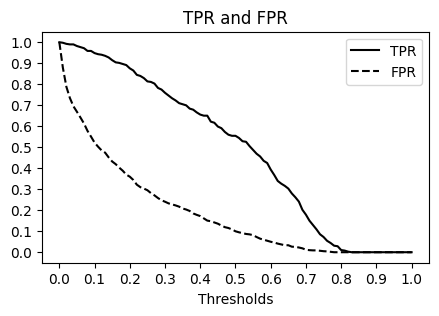

In [24]:
plt.figure(figsize=(5, 3))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

### Random baseline

In [26]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [27]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


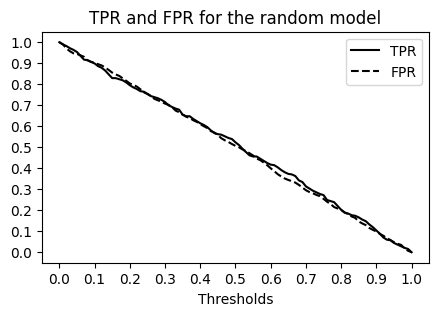

In [29]:
plt.figure(figsize=(5, 3))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')

#plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

### Ideal baseline

In [30]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


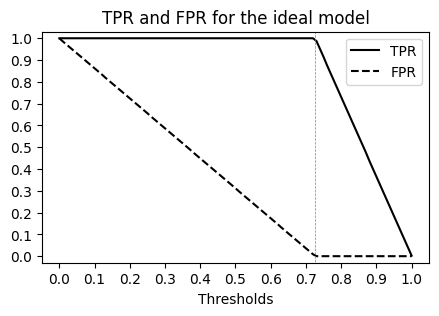

In [32]:
plt.figure(figsize=(5, 3))

plt.plot(df_ideal.threshold, df_ideal.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')

# plt.savefig('04_fpr_tpr_plot_ideal.svg')

plt.show()

## ROC curve

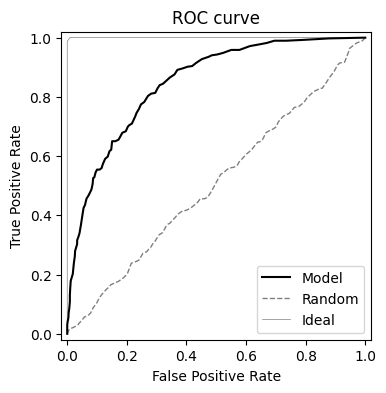

In [33]:
plt.figure(figsize=(4, 4))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1,
         linestyle='dashed', alpha=0.5, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5,
         linestyle='solid', alpha=0.5, label='Ideal')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve_with_baselines.svg')

plt.show()

#### Using Scikit-Learn for plotting the ROC curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8305002383833939

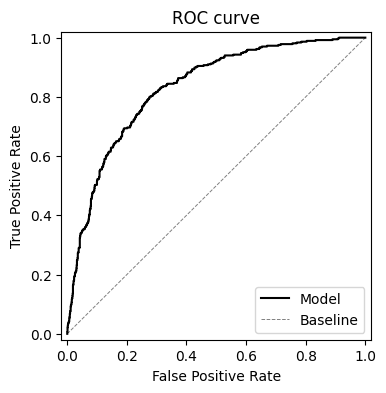

In [ ]:
plt.figure(figsize=(4, 4))

plt.plot(fpr, tpr, color='black', label='Model')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5, label='Baseline')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve.svg')

plt.show()

#### Interpretation of AUC: Area under the ROC curve
**The area under the curve (AUC)** measures the probability that a randomly chosen positive example will have a higher score than a randomly chosen negative example. It provides insight into the ability of the model to `distinguish between positive and negative classes`, with perfect separation indicating that all positive examples have higher scores than negative examples, while overlap indicates imperfect separation.